In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.colors import LogNorm
import quasiclassical_solver as qs

In [4]:
au2cm = 219474.63
au2ps = 2.4188843265864e-5
au2eV = 27.2
au2A = 0.529177
Db2au = 0.393456
U = 1822.8884

def potential( r, th, C_12, alpha, mu ):
    return C_12 / r**12 - alpha * mu**2 / 2 / r**6 * ( 1 + 3 * np.cos(th)**2 )

def force_field( r, th, C_12, alpha, mu ):
    F_r = + 12 * C_12 / r**13 - 3 * alpha * mu**2 / r**7 * ( 1 + 3 * np.cos( th )**2 )
    F_th = - 3 * alpha * mu**2 / 2 / r**6 * np.sin( 2 * th )

    return F_r, F_th

# Simulation

In [5]:
solv = qs.Quasi_classic( m_rot = 110 * U, 
                        Be_rot = 5614 * 1.5198298460570 * 1e-10, 
                        m_proj = 20 * U 
                        )

solv.set_potential( lambda r, th: 
                   potential( r, th, 
                             C_12 = 2.5e7, 
                             alpha = 27.6 / au2A**3, 
                             mu = 2.38 * Db2au 
                            ) 
                    )
# solv.set_force( lambda r, th: force_field( r, th, C_12, alpha, mu )[0] )

j_init_arr = [0, 1, 3, 5, 10]

t_arr = []
alig_arr = []
r_arr = []
p_arr = []

t_eval = np.linspace( 0, 1.9 / au2ps, 1000 )

for l in j_init_arr:
    solv.set_hilbert_space( max_l=50, max_m = l )
    solv.set_initial_conditions( E_col = 0.5 / au2eV, r_0 = 20.0, l_0 = l )
    solv.solve(t_max = 2 / au2ps, t_eval = t_eval)

    # plt.plot( solv.t*au2ps, solv.alignment, label = f"j = {l}" )
    t_arr.append( solv.t )
    alig_arr.append( solv.alignment )
    r_arr.append( solv.r )
    p_arr.append( solv.p )

    print( f"j_init={l} finished" )

pass

j_init=0 finished
j_init=1 finished
j_init=3 finished
j_init=5 finished
j_init=10 finished


# Plotting

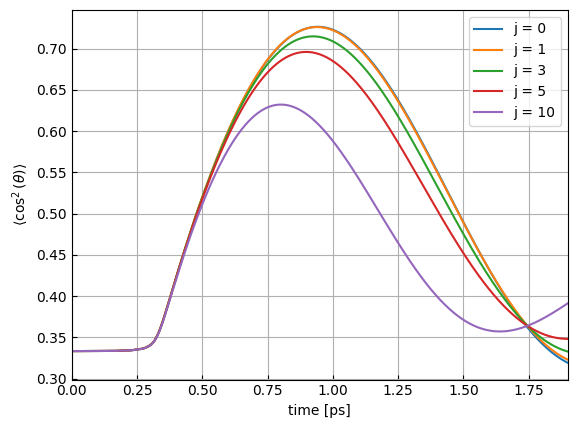

In [6]:

linestyle_arr = [ "solid", "dashed", "dashdot", "dotted", (0,(1,3)) ]

j_arr = [0, 1, 3, 5, 10]

al_av_arr = []
al_max_arr = []
al_min_arr = []

for t, alig, lnst, j in zip( t_arr, alig_arr, linestyle_arr, j_arr ):
    plt.plot( t*au2ps, alig, label=f"j = {j}")


plt.xlabel("time [ps]")
plt.ylabel( r"$\left< \cos^2(\theta) \right>$" )

plt.grid()
plt.tick_params(which='both', direction="in")
plt.legend()
plt.xlim(0, 1.9)
plt.savefig("hyq_qc_alignment.pdf")

pass